In [89]:
import os
from collections import Counter
import pickle
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from IPython.display import Audio

WAV_DIR = '/data/speechdb/aihub_emotion/wav/' # 4차 + 5차 + 5차_2
CSV_DIR = '/data/speechdb/aihub_emotion/'

AUDIO_SR = 16000

In [90]:
glob(WAV_DIR + '*')[:10]

['/data/speechdb/aihub_emotion/wav/5e378eaec8c25f16cd1453c4.wav',
 '/data/speechdb/aihub_emotion/wav/5f6a1bb7d338b948c4e6852f.wav',
 '/data/speechdb/aihub_emotion/wav/5f07bd07b140144dfcff0912.wav',
 '/data/speechdb/aihub_emotion/wav/5f656014f8fac448cc0a5879.wav',
 '/data/speechdb/aihub_emotion/wav/5f8a41c7d338b948c4e69d51.wav',
 '/data/speechdb/aihub_emotion/wav/5e34c7a85807b852d9e06810.wav',
 '/data/speechdb/aihub_emotion/wav/5e5288c5963e443aee02b71b.wav',
 '/data/speechdb/aihub_emotion/wav/5f6aef449e04b149046cbacd.wav',
 '/data/speechdb/aihub_emotion/wav/5f62107bb878131628349d65.wav',
 '/data/speechdb/aihub_emotion/wav/5f61880454b2361621284b97.wav']

In [92]:
csv_files = glob(CSV_DIR + '*.csv')
csv_files

['/data/speechdb/aihub_emotion/5차년도.csv',
 '/data/speechdb/aihub_emotion/5차년도_2차.csv',
 '/data/speechdb/aihub_emotion/4차년도.csv']

In [6]:
df_script = []
for f in csv_files:
    print(f)
    _df = pd.read_csv(f, encoding='cp949')
    df_script.append(_df)
    print(len(_df))

/data/speechdb/aihub_emotion/5차년도.csv
10011
/data/speechdb/aihub_emotion/5차년도_2차.csv
19374
/data/speechdb/aihub_emotion/4차년도.csv
14606


In [93]:
df = pd.concat(df_script)
df = df.reset_index(drop=True)
df['발화문'] = df['발화문'].str.strip()
df['wav_id'].is_unique
df

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5ed10dbc2880d70f286121c3,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,disgust,Angry,2,Angry,2,Angry,2,Angry,2,Angry,2,33,female
1,5ecb60ef9aa8ea0eec53edb1,지금도 그대로 있어. 치우는 사람이 없어.,disgust,Neutral,0,Disgust,2,Sadness,2,Disgust,2,Disgust,1,48,female
2,5f052858b140144dfcfef768,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,sad,Sadness,2,Sadness,1,Sadness,2,Sadness,2,Sadness,2,48,female
3,5f0e72c4b140144dfcff3fa5,오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.,sad,Sadness,1,Sadness,2,Sadness,2,Sadness,2,Sadness,2,48,female
4,5ed10ddd7e21a10eee2537ce,그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!,disgust,Angry,2,Angry,2,Angry,2,Angry,2,Sadness,2,33,female
5,5f0e72e1b140144dfcff3fa6,공채로 볼 수 있는 마지막 회사였어. 그래서 정말 많이 노력했거든.,sad,Sadness,1,Sadness,2,Sadness,2,Sadness,2,Sadness,2,48,female
6,5ed10e039aa8ea0eec53f0ee,버려진 개가 워낙 많으니까 시설이 부족할 수 밖에 없고 당연히 상황이 너무 열악하지.,disgust,Angry,2,Angry,2,Angry,2,Angry,2,Sadness,2,33,female
7,5f01ce9510dbee4d2f789ad8,나 면접 또 떨어졌어.,sad,Sadness,2,Sadness,2,Sadness,2,Sadness,2,Sadness,2,48,female
8,5f0e72fbb140144dfcff3fa7,부모님께서 기대가 너무 크셔서 실망도 크실까봐 아직 말씀 못 드렸어.,sad,Sadness,1,Sadness,2,Sadness,2,Sadness,2,Sadness,2,48,female
9,5ed10e31c90a530ee56b5898,그렇지! 아 나 진짜 너무 싫어 그런 사람들. 대체 생명이 있는 개를 뭐라고 생각하...,disgust,Angry,2,Angry,2,Angry,2,Angry,2,Angry,2,33,female


In [94]:
df['상황'] = df['상황'].str.upper()
df['1번 감정'] = df['1번 감정'].str.upper()
df['2번 감정'] = df['2번 감정'].str.upper()
df['3번 감정'] = df['3번 감정'].str.upper()
df['4번 감정'] = df['4번 감정'].str.upper()
df['5번 감정'] = df['5번 감정'].str.upper()

In [19]:
## 파일명이랑 다른 wav_id 매핑
wav_id_map = '''5e38d5fe05fef317e874c705	5e3292655807b852d9e03896
5e39383fdbc4b7182a6aa5f4	5e2ad43e5807b852d9e020dc
5e38d655dbc4b7182a6aa405	5e3292825807b852d9e0389a
5e37e25905fef317e874c12e	5e33638b5807b852d9e04aeb
5e38a1d805fef317e874c5f7	5e298bc45807b852d9e01a10
5e38d5c133e9ad176cc9b8e5	5e32924e5807b852d9e03894
5e393e55ee8206179943d383	5e3161c65807b852d9e032af
5e37da3e33e9ad176cc9b2b1	5e2998b85807b852d9e01b02
5e3937ab05fef317e874c913	5e2ad4145807b852d9e020d9
5e38a184c8c25f16cd145d22	5e298b9f5807b852d9e01a0f
5e37def1dbc4b7182a6a9e44	5e2979c25807b852d9e018d5
5e380ef305fef317e874c3b5	5e315dca5807b852d9e03275
5e37e2f005fef317e874c13e	5e33a9d35807b852d9e050f4
5e38a2037995ef170fc0f96c	5e298bdc5807b852d9e01a11
5e38a219c8c25f16cd145d25	5e298c085807b852d9e01a12
5e393ea333e9ad176cc9bae6	5e31622f5807b852d9e032ba'''.split('\n')
wav_id_map = {ids.split('\t')[1]:ids.split('\t')[0] for ids in wav_id_map}
df['wav_id'] = df['wav_id'].apply(lambda wid: wav_id_map[wid] if wid in wav_id_map else wid)

In [20]:
df[:5]

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5ed10dbc2880d70f286121c3,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,DISGUST,ANGRY,2,ANGRY,2,ANGRY,2,ANGRY,2,ANGRY,2,33,female
1,5ecb60ef9aa8ea0eec53edb1,지금도 그대로 있어. 치우는 사람이 없어.,DISGUST,NEUTRAL,0,DISGUST,2,SADNESS,2,DISGUST,2,DISGUST,1,48,female
2,5f052858b140144dfcfef768,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,SAD,SADNESS,2,SADNESS,1,SADNESS,2,SADNESS,2,SADNESS,2,48,female
3,5f0e72c4b140144dfcff3fa5,오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.,SAD,SADNESS,1,SADNESS,2,SADNESS,2,SADNESS,2,SADNESS,2,48,female
4,5ed10ddd7e21a10eee2537ce,그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!,DISGUST,ANGRY,2,ANGRY,2,ANGRY,2,ANGRY,2,SADNESS,2,33,female


In [95]:
# 상황 Normalize
# 7가지 감정 happiness, angry, disgust, fear, neutral, sadness, surprise
emo_normalizer ={
    'SAD' : 'SADNESS',
    'ANGER':'ANGRY'
}

df['상황'] = df['상황'].apply(lambda emo: emo_normalizer[emo] if emo in emo_normalizer else emo)

In [101]:
# 학습 레이블 설정
# 1,2,3,4,5 보팅 후 레이블링
df['label'] = df.apply(lambda row: Counter([row['1번 감정'], row['2번 감정'], row['3번 감정'], row['4번 감정'], row['5번 감정']]).most_common(1)[0][0], axis=1)

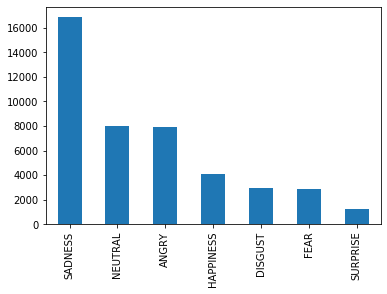

In [102]:
df['label'].value_counts().plot('bar')

In [59]:
len(df)

43991

In [58]:
# df.to_csv('./data/SER.tsv', index=None, sep='\t')
df = pd.read_csv('./data/SER.tsv', sep='\t')

In [60]:
df = df.sample(frac=1, random_state=1)
df_train = df[:int(len(df)*0.7)]
df_valid = df[int(len(df)*0.7):]

In [100]:
df_train

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별,label
16229,5f6fe2a4d338b948c4e689df,당연히 아직 자랑 안 했지! 향수 오면 할려고.,HAPPINESS,NEUTRAL,0,HAPPINESS,2,HAPPINESS,1,HAPPINESS,1,NEUTRAL,0,48,female,HAPPINESS
38658,5e4138492b6c8802f2d85a02,안그래도 올라오면서 물마시고 왔어.,DISGUST,NEUTRAL,0,DISGUST,1,DISGUST,1,DISGUST,1,DISGUST,1,28,male,DISGUST
38994,5e425abc2b6c8802f2d85bec,한달 전에 얘기했었는데 아 지금 그냥 그대로야.,ANGRY,SADNESS,2,ANGRY,1,ANGRY,1,ANGRY,1,ANGRY,2,46,female,ANGRY
12347,5f62d82bb878131628349e43,그래야겠다.,DISGUST,NEUTRAL,0,DISGUST,1,DISGUST,2,DISGUST,2,DISGUST,2,35,female,DISGUST
2903,5efdcf80704f492ee1253c83,어제 저녁에 지진이 나서 무서웠는데 다행히 다치진 않았어.,FEAR,SURPRISE,2,FEAR,2,SADNESS,1,FEAR,1,FEAR,1,35,male,FEAR
38696,5e414dc1189842034d9f7287,얘기를 못했네.,ANGRY,NEUTRAL,0,NEUTRAL,0,ANGRY,1,ANGRY,1,ANGRY,1,46,female,ANGRY
40410,5e456bc48849ac3aacea4ee4,일주일 정도 됐어.,SADNESS,SADNESS,1,SADNESS,1,SADNESS,1,SADNESS,1,SADNESS,1,37,male,SADNESS
10552,5f3ea31b9dd513131eace42e,사과도 우리가 증거를 들이 밀어서 받아낸 사과야. 그게 진정성 있겠어?,ANGRY,DISGUST,2,ANGRY,2,SADNESS,2,DISGUST,1,ANGRY,1,48,female,DISGUST
38656,5e41381048600202f726fb9e,내가 방금 갔다 왔으니까 아직도 있을 거야.,DISGUST,SADNESS,1,DISGUST,1,DISGUST,1,DISGUST,1,DISGUST,1,28,male,DISGUST
24193,5fb9f73a44697678c497b232,그렇지. 그러니까 이렇게 욕을 안 하는 사람이 욕 하는 것 아니겠어?,ANGRY,NEUTRAL,0,NEUTRAL,0,NEUTRAL,0,NEUTRAL,0,ANGRY,1,35,male,NEUTRAL


In [62]:
# df_train.to_csv('./data/SER_train.tsv', index=None, sep='\t')
# df_valid.to_csv('./data/SER_valid.tsv', index=None, sep='\t')

In [88]:
df_train[df_train['label']=='DISGUST']

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별,label
38658,5e4138492b6c8802f2d85a02,안그래도 올라오면서 물마시고 왔어.,DISGUST,NEUTRAL,0,DISGUST,1,DISGUST,1,DISGUST,1,DISGUST,1,28,male,DISGUST
12347,5f62d82bb878131628349e43,그래야겠다.,DISGUST,NEUTRAL,0,DISGUST,1,DISGUST,2,DISGUST,2,DISGUST,2,35,female,DISGUST
10552,5f3ea31b9dd513131eace42e,사과도 우리가 증거를 들이 밀어서 받아낸 사과야. 그게 진정성 있겠어?,ANGRY,DISGUST,2,ANGRY,2,SADNESS,2,DISGUST,1,ANGRY,1,48,female,DISGUST
38656,5e41381048600202f726fb9e,내가 방금 갔다 왔으니까 아직도 있을 거야.,DISGUST,SADNESS,1,DISGUST,1,DISGUST,1,DISGUST,1,DISGUST,1,28,male,DISGUST
2365,5ef95f5abed0201b73513c94,아까 가봤더니 아직도 그대로 있어!,DISGUST,DISGUST,2,DISGUST,2,DISGUST,1,DISGUST,1,DISGUST,1,48,female,DISGUST
24011,5fb8e6bf576e9378b67ac4c3,쓰레기가 냄새가 나는 거 같아.,DISGUST,DISGUST,1,SADNESS,1,NEUTRAL,0,DISGUST,1,SADNESS,1,24,male,DISGUST
18960,5f9175f09e04b149046cdb80,화장실은 아무리 청소를 해도 곰팡이가 없어지지 않아!,ANGRY,DISGUST,1,ANGRY,2,SADNESS,1,DISGUST,1,DISGUST,1,46,female,DISGUST
39503,5e42b4da2b6c8802f2d85d5b,"정말 최악이다! 몰라, 아직도 그대로 있을걸?",DISGUST,ANGRY,2,DISGUST,2,DISGUST,1,DISGUST,1,DISGUST,2,39,male,DISGUST
29698,5e2d99095807b852d9e026e9,"으, 누군가가 화장실에서 토하고 안 치웠어.",DISGUST,DISGUST,2,DISGUST,2,DISGUST,2,DISGUST,1,DISGUST,1,30,female,DISGUST
29545,5e2bf69a5807b852d9e023f9,누가 화장실에 토하고 하나도 안 치웠어.,DISGUST,DISGUST,1,DISGUST,2,DISGUST,1,DISGUST,1,ANGRY,1,32,female,DISGUST


In [87]:
wav_id = '5f5f6a0ab878131628349b2c'
wav_file = os.path.join('/data/speechdb/aihub_emotion/wav/', wav_id+'.wav')
Audio(wav_file)

In [111]:
def show_spectrogram(wav, sample_rate=16000, figsize=(20, 4)):
    spect = log_specgram(wav)
    print(spect.shape)
    fig = plt.figure(figsize=figsize)
    plt.imshow(spect, aspect='auto', origin='lower')
    plt.title('Spectrogram')
    plt.ylabel('Freqs in Hz')
    plt.xlabel('Seconds')
    plt.show()

def log_specgram(wav, sr=16000, eps=1e-8):
    '''
    로그 스펙트로그램 변환
    '''
    D = librosa.stft(wav, n_fft=240, hop_length=120, win_length=240, window='hamming')
    spect, phase = librosa.magphase(D)
    return np.log(spect + eps)

wav, sample_rate = librosa.load(f1, sr=AUDIO_SR)

(121, 427)


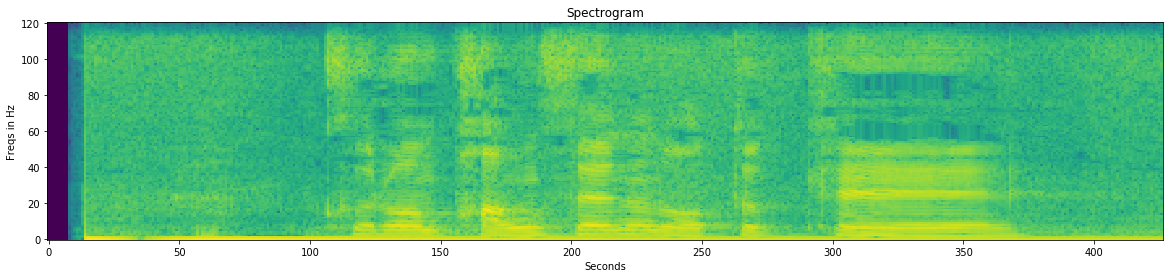

In [114]:
show_spectrogram(wav)